#  Import Packages and Functions
We'll make use of the following packages:

* numpy and pandas is what we'll use to manipulate our data
* matplotlib.pyplot and seaborn will be used to produce plots for visualization
* util will provide the locally defined utility functions that have been provided for this assignment
We will also use several modules from the keras framework for building deep learning models.

Run the next cell to import all the necessary packages.



In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

os.listdir("D:\SDP\chest_xray")

['test', 'train', 'val']

In [4]:
len(os.listdir("D:/SDP/chest_xray/train/PNEUMONIA"))

3875

The dataset is divided into three sets: 1) Train set 2) Validation set and 3) Test set.

# Data Visualization


Train set:
PNEUMONIA=3875
NORMAL=1341
Test set:
PNEUMONIA=390
NORMAL=234
Validation set:
PNEUMONIA=8
NORMAL=8


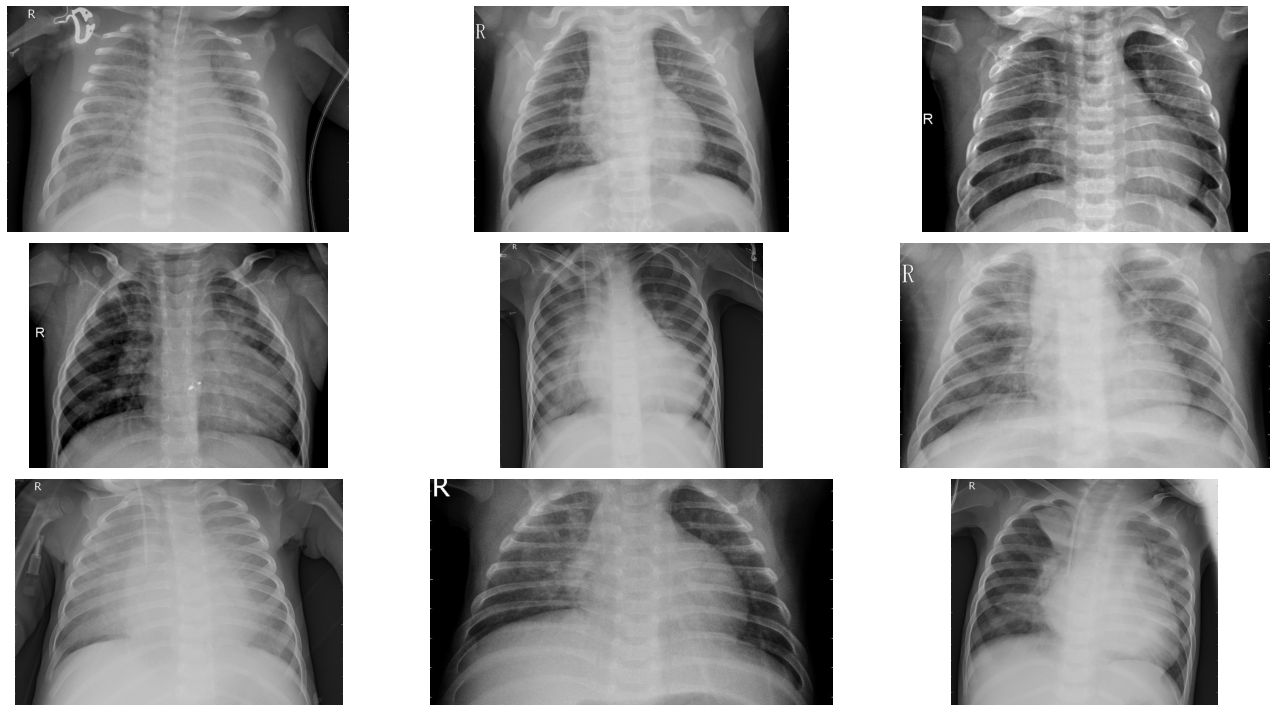

In [2]:
train_dir = "D:/SDP/chest_xray/train"
test_dir = "D:/SDP/chest_xray/test"
val_dir = "D:/SDP/chest_xray/val"

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

pneumonia = os.listdir("D:/SDP/chest_xray/train/PNEUMONIA")
pneumonia_dir = "D:/SDP/chest_xray/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

In [ ]:
normal = os.listdir("D:/SDP/chest_xray/train/NORMAL")
normal_dir = "D:/SDP/chest_xray/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

The dimensions of the image are 1858 pixels width and 2090 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 128.9075 and the standard deviation is 62.3010


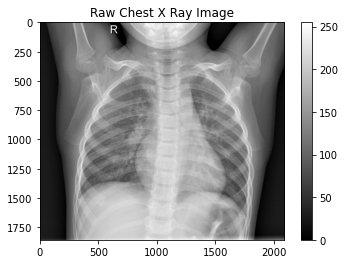

In [9]:
normal_img = os.listdir("D:/SDP/chest_xray/train/NORMAL")[0]
normal_dir = "D:/SDP/chest_xray/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

# Ivestigate pixel value distribution

C:\Users\udayk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

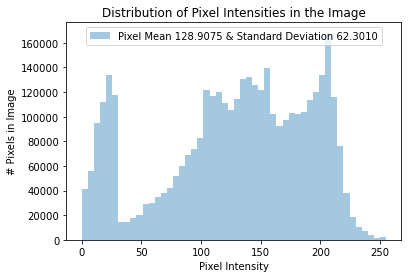

In [10]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# 2. Image Preprocessing
Before training, we'll first modify your images to be better suited for training a convolutional neural network. For this task we'll use the Keras ImageDataGenerator function to perform data preprocessing and data augmentation.

This class also provides support for basic data augmentation such as random horizontal flipping of images.
We also use the generator to transform the values in each batch so that their mean is 0 and their standard deviation is 1 (this will faciliate model training by standardizing the input distribution).
The generator also converts our single channel X-ray images (gray-scale) to a three-channel format by repeating the values in the image across all channels (we will want this because the pre-trained model that we'll use requires three-channel inputs).

In [11]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Build a separate generator fo valid and test sets



In [12]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 2.9377 and the minimum is -2.4324
The mean value of the pixels is -0.0000 and the standard deviation is 1.0000


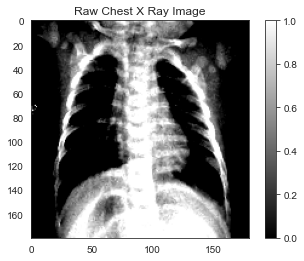

In [13]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

Text(0, 0.5, '# Pixels in Image')

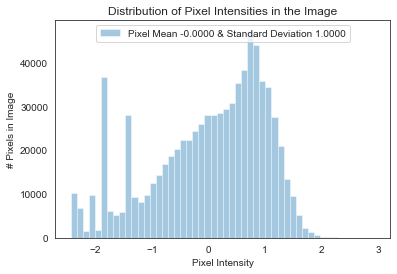

In [14]:
sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# Building a CNN model



In [15]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 178, 178, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 176, 176, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 32)       0         
 )                                                               
                                                        

In [18]:
r = model.fit(
    train, 
    epochs=10,
    validation_data=validation, 
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/10
100/100 [==============================] - 232s 2s/step - loss: 0.9576 - accuracy: 0.8062 - val_loss: 16.5385 - val_accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 211s 2s/step - loss: 0.2502 - accuracy: 0.8112
Epoch 3/10
100/100 [==============================] - 201s 2s/step - loss: 0.1493 - accuracy: 0.8288
Epoch 4/10
100/100 [==============================] - 200s 2s/step - loss: 0.1867 - accuracy: 0.8675
Epoch 5/10
100/100 [==============================] - 200s 2s/step - loss: 0.1007 - accuracy: 0.8838
Epoch 6/10
100/100 [==============================] - 198s 2s/step - loss: 0.0956 - accuracy: 0.8988
Epoch 7/10
100/100 [==============================] - 199s 2s/step - loss: 0.1614 - accuracy: 0.8900
Epoch 8/10
100/100 [==============================] - 216s 2s/step - loss: 0.1248 - accuracy: 0.8900
Epoch 9/10
100/100 [==============================] - 197s 2s/step - loss: 0.0737 - accuracy: 0.9275
Epoch 10/10
100/100 [===========================

Text(0.5, 1.0, 'Accuracy Evolution')

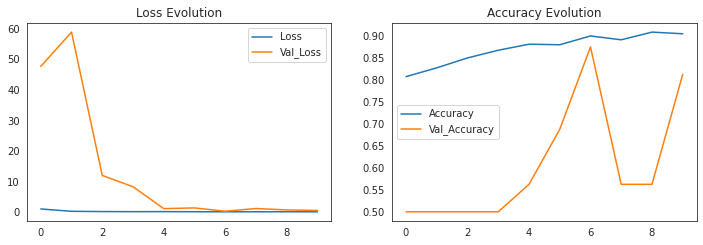

In [15]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [16]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 14s 23ms/step - loss: 0.4296 - accuracy: 0.8462
Test Accuracy: 84.62%
652/652 [==============================] - 103s 159ms/step - loss: 0.3312 - accuracy: 0.8969
Train Accuracy: 89.69%


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

[[181  53]
 [ 46 344]]


,0,1,accuracy,macro avg,weighted avg
precision,0.797357,0.866499,0.841346,0.831928,0.840571
recall,0.773504,0.882051,0.841346,0.827778,0.841346
f1-score,0.785249,0.874206,0.841346,0.829728,0.840847
support,234.000000,390.000000,0.841346,624.000000,624.000000


In [18]:
print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

[[200  34]
 [ 81 309]]


,0,1,accuracy,macro avg,weighted avg
precision,0.711744,0.900875,0.815705,0.806309,0.829951
recall,0.854701,0.792308,0.815705,0.823504,0.815705
f1-score,0.776699,0.843111,0.815705,0.809905,0.818206
support,234.000000,390.000000,0.815705,624.000000,624.000000


# Transfer Learning



In [19]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

29089792/29084464 [==============================] - 1s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 186, 186, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 90, 90, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 90, 90, 64)   256         conv1/conv[0][0]                 
_______________________

In [20]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [21]:
print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The input shape Tensor("input_1:0", shape=(None, 180, 180, 3), dtype=float32)
The output shape Tensor("avg_pool/Identity:0", shape=(None, 1024), dtype=float32)


In [22]:

#model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
#model.add(base_model)
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [23]:
r = model.fit(
    train, 
    epochs=10,
    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/10
100/100 [==============================] - 21s 207ms/step - loss: 0.1705 - accuracy: 0.8275 - val_loss: 8.3540 - val_accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 17s 169ms/step - loss: 0.1189 - accuracy: 0.8725 - val_loss: 2.6481 - val_accuracy: 0.6250
Epoch 3/10
100/100 [==============================] - 18s 179ms/step - loss: 0.0975 - accuracy: 0.8875 - val_loss: 1.5859 - val_accuracy: 0.5000
Epoch 4/10
100/100 [==============================] - 18s 176ms/step - loss: 0.1059 - accuracy: 0.8988 - val_loss: 0.9687 - val_accuracy: 0.5625
Epoch 5/10
100/100 [==============================] - 18s 179ms/step - loss: 0.0798 - accuracy: 0.9112 - val_loss: 1.3149 - val_accuracy: 0.6875
Epoch 6/10
100/100 [==============================] - 19s 187ms/step - loss: 0.0721 - accuracy: 0.9212 - val_loss: 2.3806 - val_accuracy: 0.5000
Epoch 7/10
100/100 [==============================] - 17s 171ms/step - loss: 0.1056 - accuracy: 0.8975 - val_loss: 0.8888 - val_ac

Text(0.5, 1.0, 'Accuracy Evolution')

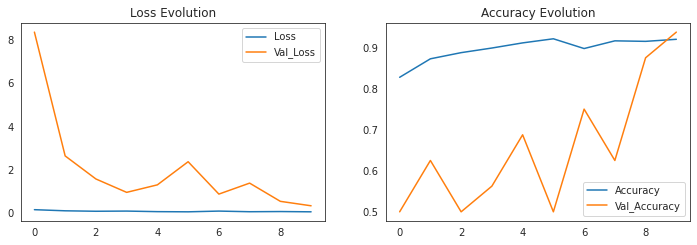

In [24]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [25]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 15s 24ms/step - loss: 0.3812 - accuracy: 0.8446
Test Accuracy: 84.46%
652/652 [==============================] - 97s 148ms/step - loss: 0.2113 - accuracy: 0.9245
Train Accuracy: 92.45%


# Evaluation

In [26]:
predicted_vals = model.predict(test, steps=len(test))

In [27]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[175  59]
 [ 42 348]]


,0,1,accuracy,macro avg,weighted avg
precision,0.806452,0.855037,0.838141,0.830744,0.836817
recall,0.747863,0.892308,0.838141,0.820085,0.838141
f1-score,0.776053,0.873275,0.838141,0.824664,0.836817
support,234.000000,390.000000,0.838141,624.000000,624.000000


# VGG16


In [28]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications import VGG16


vgg16_base_model = VGG16(input_shape=(180,180,3),include_top=False,weights='imagenet')

    


58892288/58889256 [==============================] - 1s 0us/step


In [29]:
vgg16_base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

In [30]:


    vgg16_model = tf.keras.Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

In [31]:
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [32]:
r = vgg16_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)



Epoch 1/10
100/100 [==============================] - 17s 171ms/step - loss: 0.2456 - accuracy: 0.6750 - precision: 0.8983 - recall: 0.6231 - val_loss: 8.8623 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 18s 176ms/step - loss: 0.2209 - accuracy: 0.7113 - precision: 0.9064 - recall: 0.6949 - val_loss: 7.7409 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
100/100 [==============================] - 16s 160ms/step - loss: 0.2153 - accuracy: 0.7337 - precision: 0.9087 - recall: 0.7097 - val_loss: 0.7526 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.1250
Epoch 4/10
100/100 [==============================] - 18s 178ms/step - loss: 0.1775 - accuracy: 0.7887 - precision: 0.9350 - recall: 0.7637 - val_loss: 2.8258 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/10
100/100 [==============================] - 16s 164ms/step - loss:

Text(0.5, 1.0, 'Accuracy Evolution')

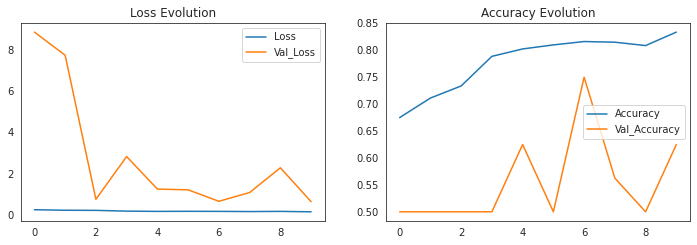

In [33]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [34]:
evaluation =vgg16_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = vgg16_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 13s 21ms/step - loss: 0.8073 - accuracy: 0.6571 - precision: 0.9272 - recall: 0.4897
Test Accuracy: 65.71%
652/652 [==============================] - 99s 152ms/step - loss: 0.9043 - accuracy: 0.6181 - precision: 0.9963 - recall: 0.4877
Train Accuracy: 61.81%


# ResNet



In [35]:
from keras.applications import ResNet50

resnet_base_model = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')



94773248/94765736 [==============================] - 1s 0us/step


In [36]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 186, 186, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 90, 90, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 90, 90, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [37]:
    resnet_model = tf.keras.Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    resnet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [38]:
r = resnet_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)


Epoch 1/10
100/100 [==============================] - 18s 175ms/step - loss: 0.2575 - accuracy: 0.6625 - precision: 0.8758 - recall: 0.6486 - val_loss: 5.4126 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 18s 180ms/step - loss: 0.2642 - accuracy: 0.6662 - precision: 0.8556 - recall: 0.6650 - val_loss: 0.6702 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 0.6250
Epoch 3/10
100/100 [==============================] - 16s 163ms/step - loss: 0.1924 - accuracy: 0.7713 - precision: 0.9170 - recall: 0.7613 - val_loss: 0.9461 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/10
100/100 [==============================] - 18s 184ms/step - loss: 0.1954 - accuracy: 0.8000 - precision: 0.9138 - recall: 0.7958 - val_loss: 1.2042 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/10
100/100 [==============================] - 17s 168ms/step - loss: 0.1631 

Text(0.5, 1.0, 'Accuracy Evolution')

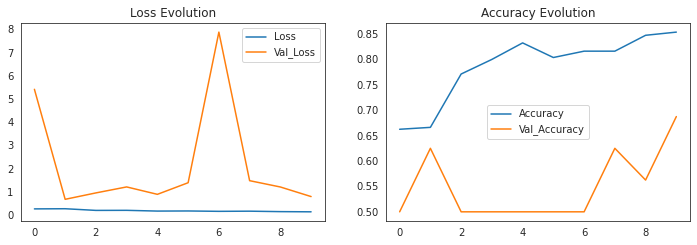

In [39]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [40]:
evaluation =resnet_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = resnet_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 14s 22ms/step - loss: 0.5498 - accuracy: 0.8173 - precision: 0.8966 - recall: 0.8000
Test Accuracy: 81.73%
652/652 [==============================] - 101s 154ms/step - loss: 0.6139 - accuracy: 0.8196 - precision: 0.9893 - recall: 0.7654
Train Accuracy: 81.96%


# InceptionNet



In [41]:
from keras.applications import InceptionV3

inception_base_model = InceptionV3(input_shape=(180,180,3),include_top=False,weights='imagenet')



87916544/87910968 [==============================] - 1s 0us/step


In [42]:
    inception_model = tf.keras.Sequential([
        inception_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    inception_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [43]:
r = inception_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)


Epoch 1/10
100/100 [==============================] - 18s 182ms/step - loss: 0.2331 - accuracy: 0.7113 - precision: 0.8994 - recall: 0.6954 - val_loss: 0.4899 - val_accuracy: 0.7500 - val_precision: 0.7000 - val_recall: 0.8750
Epoch 2/10
100/100 [==============================] - 19s 191ms/step - loss: 0.1994 - accuracy: 0.7850 - precision: 0.9289 - recall: 0.7694 - val_loss: 8.5411 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
100/100 [==============================] - 16s 158ms/step - loss: 0.1820 - accuracy: 0.7763 - precision: 0.9300 - recall: 0.7635 - val_loss: 12.8820 - val_accuracy: 0.6250 - val_precision: 0.7500 - val_recall: 0.3750
Epoch 4/10
100/100 [==============================] - 20s 195ms/step - loss: 0.1638 - accuracy: 0.8062 - precision: 0.9461 - recall: 0.7874 - val_loss: 2.0006 - val_accuracy: 0.3125 - val_precision: 0.3333 - val_recall: 0.3750
Epoch 5/10
100/100 [==============================] - 16s 165ms/step - loss: 0.1921

Text(0.5, 1.0, 'Accuracy Evolution')

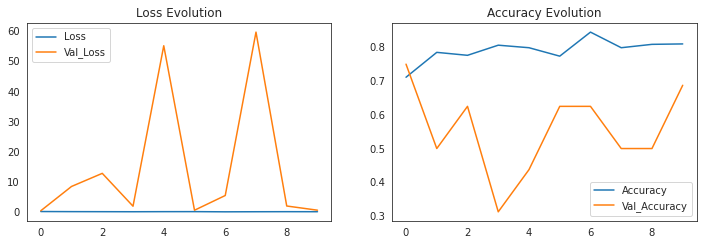

In [44]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [45]:
evaluation =inception_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = inception_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 16s 25ms/step - loss: 0.6258 - accuracy: 0.7051 - precision: 0.9120 - recall: 0.5846
Test Accuracy: 70.51%
652/652 [==============================] - 103s 159ms/step - loss: 0.6924 - accuracy: 0.6904 - precision: 0.9922 - recall: 0.5879
Train Accuracy: 69.04%
